In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from PIL import Image

import math
from math import fabs

import scipy.ndimage
from scipy import misc

from bresenham import bresenham

In [11]:
'''from datetime import datetime 

name = input('Please enter a patient name: ')
surname = input('Please enter a patient surname: ')
date_str = input('Please enter a date of a research in type \'dd/mm/yy\': ')
date = datetime.strptime(date_str, '%d/%m/%y').date()
patientId = input('Please, input patient id:')

comments = input('Please enter some comments: ')'''

alfa_stopnie = int(input('Please enter an angle \'Alfa\': '))           #TODO: kat ma byc podawany przez uzytkownika
alfa = alfa_stopnie / 360 * 2 * math.pi     #zamiana ze stopni na radiany
l_det = int(input('Please enter a number of detectors: '))
max_rozwarcie = int(input('Please enter a width between first and last detector: '))
max_rozwarcie = max_rozwarcie / 360 * 2 * math.pi     #zamiana na radiany

Please enter an angle 'Alfa': 45
Please enter a number of detectors: 180
Please enter a width between first and last detector: 180


In [12]:
def drawing(center, kat, radius, stepNumber, l_op_sinog, sinog): 
    em_x = int(center + radius * math.cos(kat))
    em_y = int(center + radius * math.sin(kat))


    max_image = int(2 * center)

    for detector in range(l_det):
        det_x = int(center + radius * math.cos(kat + math.pi - max_rozwarcie/2 + detector * max_rozwarcie/ (l_det - 1)))
        det_y = int(center + radius * math.sin(kat + math.pi - max_rozwarcie/2 + detector * max_rozwarcie/ (l_det - 1)))
        points = list(bresenham(em_x, em_y, det_x, det_y))
        
        for x, y in points:
            if x>=0 and x < max_image and y>=0 and y < max_image:
                sinog[detector][stepNumber] += image[x][y]
                l_op_sinog[detector][stepNumber] += 1
                #image[x][y] = [255, 255, 255]              #255 -> bialy, 0 -> czarny
                

Center:  512.0 z:  1024  i  1024
Radius:  724.0773439350247
Low y:  1236.0773439350246
udalo sie  1
udalo sie  2
udalo sie  3
udalo sie  4
udalo sie  5
udalo sie  6
udalo sie  7
udalo sie  8
udalo sie  9
udalo sie  10
udalo sie  11
udalo sie  12
udalo sie  13
udalo sie  14
udalo sie  15
udalo sie  16
udalo sie  17
udalo sie  18
udalo sie  19
udalo sie  20
udalo sie  21
udalo sie  22
udalo sie  23
udalo sie  24
udalo sie  25
udalo sie  26
udalo sie  27
udalo sie  28
udalo sie  29
udalo sie  30
udalo sie  31
udalo sie  32
udalo sie  33
udalo sie  34
udalo sie  35
udalo sie  36
udalo sie  37
udalo sie  38
udalo sie  39
udalo sie  40
udalo sie  41
udalo sie  42
udalo sie  43
udalo sie  44
udalo sie  45
udalo sie  46
udalo sie  47
udalo sie  48
udalo sie  49
udalo sie  50
udalo sie  51
udalo sie  52
udalo sie  53
udalo sie  54
udalo sie  55
udalo sie  56
udalo sie  57
udalo sie  58
udalo sie  59
udalo sie  60
udalo sie  61
udalo sie  62
udalo sie  63
udalo sie  64
udalo sie  65
udalo sie  6

KeyboardInterrupt: 

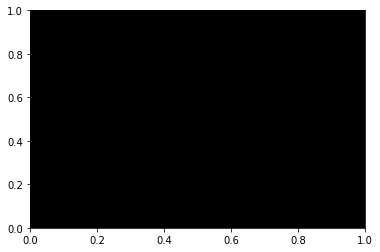

In [13]:
image = imageio.imread('./tomograf-zdjecia/Shepp_logan.jpg')
center = max(len(image), len(image[0]))/2
circleRed = plt.Circle((center, center), center * math.sqrt(2), edgecolor='w', facecolor='none')

fig, ax = plt.subplots() 
ax.set_facecolor('black')
#im = plt.imshow(image)

height_y = center - (center * 2 * math.sqrt(2) / 2)
low_y = center + center * 2 * math.sqrt(2) / 2
radius = center * 2 * math.sqrt(2) / 2      #od_srodka do boku * 2 * sqrt(2)\n",

print('Center: ', center, 'z: ', len(image), ' i ', len(image[0]))
print('Radius: ', radius)

ilosc_katow = int( math.pi * radius / alfa )   #obwod 2*pi*R -> bierzemy dlugosc i nasz kat
stepNumber = 0
kat = stepNumber * alfa    #kat zmienia się o alfa od zera do polowy okregu


# suma pikseli dla kazdego [emiter][kat]
sinog = [ [ [0, 0, 0] for y in range( ilosc_katow ) ] for x in range( l_det ) ]
# ilosc skladnikow odpowiadajaca kazdej komorce z tablicy sinog
l_op_sinog = [ [ 0 for y in range( ilosc_katow ) ] for x in range( l_det ) ]

print('Low y: ', low_y)
while (stepNumber < ilosc_katow):
    drawing(center, kat, radius, stepNumber, l_op_sinog, sinog)
    stepNumber += 1
    kat = stepNumber * alfa
    print('udalo sie ', stepNumber)
    

for y in range( ilosc_katow ):
    for x in range( l_det ):
        if l_op_sinog[x][y] == 0:
             l_op_sinog[x][y] = 1


plt.imshow(image)
#im = plt.imshow(image)
#ax.add_patch(circleRed)
#plt.plot()

### Tworzenie sinogramu

In [ ]:
# wartosc srednia dla kazdego [emiter][kat] -> sinog/l_op_sinog
sinogram = [ [ [0, 0, 0] for y in range( ilosc_katow ) ] for x in range( l_det ) ]

def to_sinogram():
    for e in range(ilosc_katow):
        for k in range(l_det):
            try:
                val1 = int(round(sinog[k][e][0]/l_op_sinog[k][e]))
                val2 = int(round(sinog[k][e][1]/l_op_sinog[k][e]))
                val3 = int(round(sinog[k][e][2]/l_op_sinog[k][e]))
                #print("Wstawiam, ", val1, val2, val3, "dla ", e, k)
                val = [val1, val2, val3]
            except:
                val = [0, 0, 0]
            sinogram[k][e] = val

##############            
to_sinogram()

sinogram_array = np.asarray(sinogram)
plt.imshow(sinogram_array, aspect='auto')